# Notebook use to check what threshold should be use to find the FOCI.

You can click `shift` + `enter` to run one cell, you can also click run in top menu.
To run all the cells, you can click `kernel` and `Restart and run all` in the top menu.

In [1]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
import numpy as np
import javabridge
import bioformats
from sklearn.externals import joblib

/Users/cedricwork/anaconda3/envs/vil/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:
# Ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

### The following path should direct to the folder "utils", on Window env it should have slash " / " and not backslash " \ " . 

In [5]:
# Create a temporary python PATH to the module that we are using for the analysis
import sys
sys.path.insert(0, "/Users/cedricwork/Desktop/Bioimage_analysis_project/Chloe_Chromosome_detection/utils")

In [6]:
from chromosome_dsb import *

# Loading a typical image using bioformats

In [7]:
javabridge.start_vm(class_path=bioformats.JARS)

### In the path variable you should enter the path to your image of interest:

In [8]:
path_data = '/Users/cedricwork/Desktop/Bioimage_analysis_project/Chloe_Chromosome_detection/data/'

In [9]:
file = "20190124-AV727-mGFPCOSA1rbRAD51ckHTP3-01_visit_11.dv"

In [10]:
image, meta, directory = load_data.load_bioformats(path_data + file)

### Optionally you can visualize your data

In [11]:
#view(visualization.convert_view(image[:,:,:,3]))

# Set Parameters

In [12]:
# Size kernel for background substraction, should be a little larger than the object of interest
back_sub_FOCI = 5
back_sub_Nucleus = 20
# LOCI detection:
# Smallest object (in pixels) to be detected
smaller = 1
# Largest object to be detected
largest = 5
# Threshold above which to look for
threshold = 12000    

# Background Substraction

In [13]:
FOCI_ch, _ = img_analysis.background_correct(image, ch=1, size=back_sub_FOCI)
Nucleus_ch, _ = img_analysis.background_correct(image, ch=3, size=back_sub_Nucleus)

In [14]:
visualization.plot_background(image, FOCI_ch, Nucleus_ch)

interactive(children=(IntSlider(value=100, description='pos', max=511), Dropdown(description='channel', option…

# Finding FOCI

In [19]:
ch1 = image[:,:,:,0]

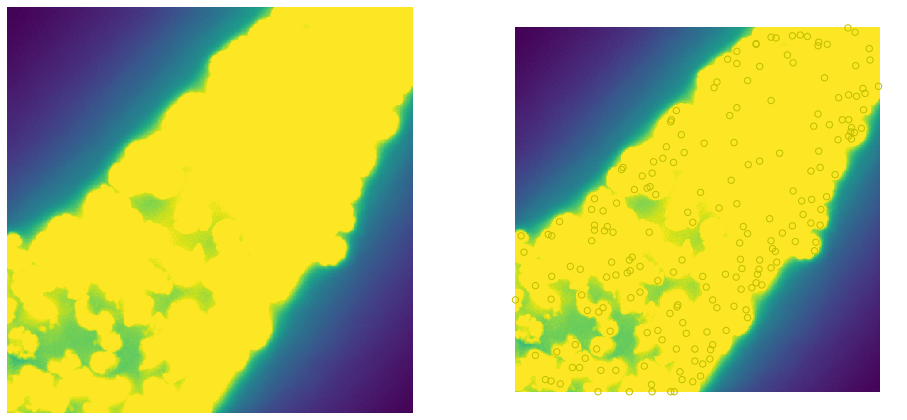

In [20]:
blobs = img_analysis.find_blob(ch1, meta, directory, smaller = smaller, 
                               largest = largest, thresh = threshold,
                               plot=True)